In [1]:
import torch
from pathlib import Path
from siren.models.dcgan import Model as DCGAN
from siren.models.sirengan import Model as SIRENGAN
from siren.models.generate import walk

In [2]:
model = SIRENGAN()
model.load(Path('../models/sirengan_cats').expanduser())

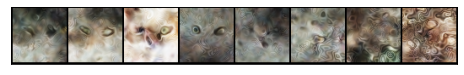

In [3]:
walk(
    model,
    torch.FloatTensor(1, 2),
    torch.randn(1, 2),
    torch.randn(1, 2),
    8,
    Path('../reports/figures/sirengan_cats'))

In [4]:
from siren.shader.utils import dump, serialize

in_w = dump(model.G.main[0].linear.weight)
in_b = dump(model.G.main[0].linear.bias)
print(in_w)
print(in_b)

out_w = dump(model.G.main[-2].weight)
out_b = dump(model.G.main[-2].bias)
print(out_w)
print(out_b)

[[-0.1565364   0.24357232 -0.04163571 -0.12541696]
 [ 0.10998784 -0.08561738  0.11326067 -0.02667228]
 [ 0.11718865 -0.09931035 -0.16445641 -0.08410072]
 [-0.10026009  0.08459715 -0.09106135  0.06055191]
 [-0.12164808  0.04553501 -0.00630485 -0.01764934]
 [ 0.11122063  0.24408343  0.05588914 -0.04282601]
 [ 0.04947203  0.15599358  0.09835313  0.13932067]
 [ 0.00527258 -0.28180885 -0.09000942  0.02414692]
 [-0.1726282   0.13183595  0.13385147  0.05890926]
 [ 0.24276781 -0.22299394  0.03373921  0.08099303]
 [-0.04311489 -0.18439381  0.06418335  0.16003315]
 [ 0.18467979  0.04757631  0.13313493 -0.0227921 ]
 [-0.24647398  0.08759011  0.11270716  0.03947139]
 [-0.03211233 -0.24778518 -0.08753224  0.06985696]
 [-0.28718996  0.19157259  0.03526693 -0.11426   ]
 [ 0.10441744  0.0776865  -0.0896545   0.07133128]
 [-0.01850965 -0.2223891   0.03250385  0.06065241]
 [ 0.04566799  0.02339978  0.10580668  0.09177866]
 [-0.2710531   0.11078728  0.04202396 -0.11421564]
 [-0.08251129  0.19178487  0.13

In [5]:
serialize(model.G, 'f')

vec4 f0_0 = sin(p.x * vec4(-4.696,3.3,3.516,-3.008) + p.y * vec4(7.307,-2.569,-2.979,2.538) + p.z * vec4(-1.249,3.398,-4.934,-2.732) + p.w * vec4(-3.763,-.8002,-2.523,1.817) + vec4(-4.071,-12.34,1.862,-4.98));
vec4 f0_1 = sin(p.x * vec4(-3.649,3.337,1.484,.1582) + p.y * vec4(1.366,7.323,4.68,-8.454) + p.z * vec4(-.1891,1.677,2.951,-2.7) + p.w * vec4(-.5295,-1.285,4.18,.7244) + vec4(12.78,11.28,-5.825,13.72));
vec4 f0_2 = sin(p.x * vec4(-5.179,7.283,-1.293,5.54) + p.y * vec4(3.955,-6.69,-5.532,1.427) + p.z * vec4(4.016,1.012,1.926,3.994) + p.w * vec4(1.767,2.43,4.801,-.6838) + vec4(.2746,-14.09,8.239,-.7637));
vec4 f0_3 = sin(p.x * vec4(-7.394,-.9634,-8.616,3.133) + p.y * vec4(2.628,-7.434,5.747,2.331) + p.z * vec4(3.381,-2.626,1.058,-2.69) + p.w * vec4(1.184,2.096,-3.428,2.14) + vec4(-13.8,7.53,-7.513,9.97));
vec4 f0_4 = sin(p.x * vec4(-.5553,1.37,-8.132,-2.475) + p.y * vec4(-6.672,.702,3.324,5.754) + p.z * vec4(.9751,3.174,1.261,4.095) + p.w * vec4(1.82,2.753,-3.426,-4.292) + vec4(-14